In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import src.data_clean as dc
from src.paths import *

%matplotlib inline
plt.style.use('bmh')

In [2]:
df = pd.read_csv(DATA / 'ml_project1_data.csv')
df = (df.assign(
         Dt_Customer = pd.to_datetime(df['Dt_Customer']))
)

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Acrescentar uma coluna com o total gasto

In [4]:
df = (df.assign(MntTotal = df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)))

### Temos clientes mais antigos ou mas novos?

In [5]:
current_year = datetime.date.today().year
df = (df.assign(Age = current_year - df['Year_Birth']))

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Age, dtype: float64

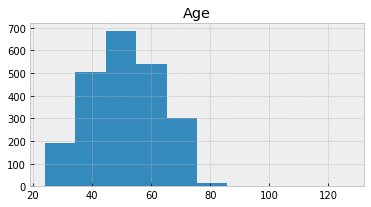

In [6]:
(plt.figure(figsize=(6,3)),
 df['Age'].hist(),
 plt.title('Age')
)
df['Age'].describe()

Há três clientes com mais de 120 anos. Devem ser dados incorretos.

count    2237.000000
mean       51.098346
std        11.701917
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

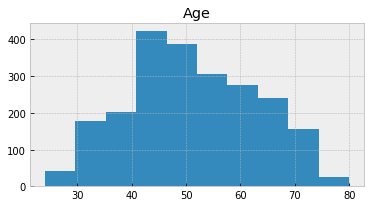

In [7]:
age_limit = 115

(plt.figure(figsize=(6,3)),
 df.query(f"Age < {age_limit}")['Age'].hist(),
 plt.title('Age')
)
df.query(f"Age < {age_limit}")['Age'].describe()

Ao removermos ested cliented, os dados ficam melhor distribuídos. Temos clientes com faixa de idade entre 23 e 80 anos. **75% dos clientes tem entre 43 e 80 anos. Talvez isso demonstre que o púlblico dessa empresa seja um público de meia idade.**

### O cliente mais novo é o que compra mais (gasto)?

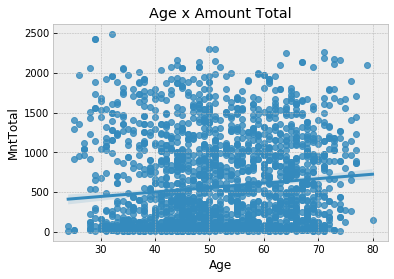

In [47]:
data = df.query(f"Age < {age_limit}")[['Age','MntTotal']].astype(float)

sns.regplot(data=data, x='Age', y='MntTotal'), plt.title("Age x Amount Total"); 

Aparentemente, não necessariamente a idade influecia no valor gasto nos últimos 2 anos.

### E se abrirmos por produto comprado, o cliente mais novo é o que compra mais?